# Project Overview
Title: Linear Regression Model: Housing Prices

Author: Jayden Chan

Description: This notebook will seek to implement a linear regression model on a dataset of housing prices. The dataset is comprised of several features including: number of bedrooms, number of bathrooms, numbers of floors, etc. The goal of this model will be to predict the price of a house when given certain features.

Credits: The dataset used in this notebook has been sourced from [Kaggle](https://www.kaggle.com/datasets/sukhmandeepsinghbrar/housing-price-dataset). Some code has been sourced from [Coursera](https://www.coursera.org/learn/machine-learning) and edited to fit project requirements.

# Outline
- [ 1 - Packages ](#packages)
- [ 2 - Data Preparation ](#data_preparation)
    - [ 2.1 - Data Loading ](#data_loading)
    - [ 2.2 - Data Analysis ](#data_analysis)
    - [ 2.3 - Feature Normalization ](#feature_normalization)
    - [ 2.4 - Data Visualization ](#data_visualization)
    - [ 2.5 - Feature Mapping ](#feature_mapping)
- [ 3 - Linear Regression ](#linear_regression)
    - [ 3.1 - Cost Function ](#cost_function)
    - [ 3.2 - Gradient Function ](#gradient_function)
    - [ 3.3 - Gradient Descent ](#gradient_descent)
    - [ 3.4 - Batch Gradient Descent ](#batch_gradient_descent)
    - [ 3.5 - Prediction Accuracy ](#prediction_accuracy)

<a id='packages'></a>
## 1 - Packages
- [numpy](www.numpy.org)
- [matplotlib](http://matplotlib.org)
-  ``utility.py`` contains useful helper functions for the implementation of this notebook.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from utility import *
import copy
import math

%matplotlib inline

<a id='data_preparation'></a>
## 2 - Data Preparation

<a id='data_loading'></a>
### 2.1 - Data Loading

The `load_data()` function will load the data in the .csv file into 3 arrays.
- `categories` contains the names of the features in the dataset.
- `x_data` contains the features in a 2D numpy array.
- `y_data` contains the targets in a 1D numpy array.

This dataset contains `id` and `date` features that we will not be using. So instead, we will be using a modified function `load_data_housingPrices()`.

In [18]:
categories, x_data, y_data = load_data_housingPrices("Housing.csv", 2)

<a id='data_analysis'></a>
### 2.2 - Data Analysis

In [19]:
# View categories
print("The categories are:\n", categories[:])

The categories are:
 ['bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors' 'waterfront'
 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15']


In [20]:
# View features
print("First five elements in x_date are:\n", x_data[:5])
print("Type of x_date", type(x_data))

First five elements in x_date are:
 [[ 2.00000e+00  1.00000e+00  1.18000e+03  5.65000e+03  1.00000e+00
   0.00000e+00  0.00000e+00  3.00000e+00  7.00000e+00  1.18000e+03
   0.00000e+00  1.95500e+03  0.00000e+00  9.81780e+04  4.75112e+01
  -1.22257e+02  1.34000e+03]
 [ 3.00000e+00  2.25000e+00  2.57000e+03  7.24200e+03  2.00000e+00
   0.00000e+00  0.00000e+00  3.00000e+00  7.00000e+00  2.17000e+03
   4.00000e+02  1.95100e+03  1.99100e+03  9.81250e+04  4.77210e+01
  -1.22319e+02  1.69000e+03]
 [ 2.00000e+00  1.00000e+00  7.70000e+02  1.00000e+04  1.00000e+00
   0.00000e+00  0.00000e+00  3.00000e+00  6.00000e+00  7.70000e+02
   0.00000e+00  1.93300e+03  0.00000e+00  9.80280e+04  4.77379e+01
  -1.22233e+02  2.72000e+03]
 [ 4.00000e+00  3.00000e+00  1.96000e+03  5.00000e+03  1.00000e+00
   0.00000e+00  0.00000e+00  5.00000e+00  7.00000e+00  1.05000e+03
   9.10000e+02  1.96500e+03  0.00000e+00  9.81360e+04  4.75208e+01
  -1.22393e+02  1.36000e+03]
 [ 3.00000e+00  2.00000e+00  1.68000e+03  8.

In [21]:
# View targets
print("First five elements in y_data are:\n", y_data[:5])
print("Type of y_data", type(y_data))

First five elements in y_data are:
 [231300. 538000. 180000. 604000. 510000.]
Type of y_data <class 'numpy.ndarray'>


In [22]:
# View sizes
print ('The shape of x_data is: ' + str(x_data.shape))
print ('The shape of y_data is: ' + str(y_data.shape))
print ('We have m = %d training examples' % (len(y_data)))

The shape of x_data is: (21613, 17)
The shape of y_data is: (21613,)
We have m = 21613 training examples


<a id='feature_normalization'></a>
### 2.3 - Feature Normalization

Because some of the features and targets have large differences in scale, we will be performing feature scaling to modify the data.

In [23]:
x_data_scaled = feature_scaling(x_data)
y_data_scaled = feature_scaling(y_data)

In [24]:
# View scaled features
print("First five elements in x_date_scaled are:\n", x_data_scaled[:5])
print("Type of x_date_scaled", type(x_data_scaled))

First five elements in x_date_scaled are:
 [[0.06060606 0.125      0.06716981 0.00310751 0.         0.
  0.         0.5        0.5        0.09758772 0.         0.47826087
  0.         0.89393939 0.57149751 0.21760797 0.16193426]
 [0.09090909 0.28125    0.17207547 0.00407187 0.4        0.
  0.         0.5        0.5        0.20614035 0.08298755 0.44347826
  0.98808933 0.62626263 0.90895931 0.16611296 0.22216486]
 [0.06060606 0.125      0.03622642 0.00574253 0.         0.
  0.         0.5        0.41666667 0.05263158 0.         0.28695652
  0.         0.13636364 0.93614283 0.23754153 0.3994149 ]
 [0.12121212 0.375      0.12603774 0.00271377 0.         0.
  0.         1.         0.5        0.08333333 0.18879668 0.56521739
  0.         0.68181818 0.58693904 0.10465116 0.16537601]
 [0.09090909 0.25       0.10490566 0.00457949 0.         0.
  0.         0.5        0.58333333 0.15241228 0.         0.75652174
  0.         0.36868687 0.74135435 0.39368771 0.24109448]]
Type of x_date_scaled <cla

In [25]:
# View scaled targets
print("First five elements in y_data_scaled are:\n", y_data_scaled[:5])
print("Type of y_data_scaled", type(y_data_scaled))

First five elements in y_data_scaled are:
 [0.02049836 0.06072131 0.01377049 0.06937705 0.05704918]
Type of y_data_scaled <class 'numpy.ndarray'>


<a id='data_visualization'></a>
### 2.4 - Data Visualization

Change the `category` input to determine what is graphed on the x-axis.

Change the `marker_size` input to determine the size of markers on the graph.

<function matplotlib.pyplot.show(close=None, block=None)>

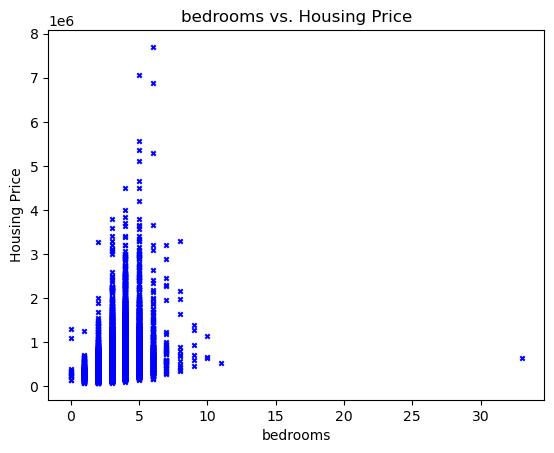

In [26]:
# ===== User Settings =====
category = 1

marker_size = 10

# ===== Graph Normal =====
plt.scatter(x_data[:, category], y_data, marker='x', c='b', s=marker_size),
plt.title(categories[category] + " vs. Housing Price")
plt.ylabel("Housing Price")
plt.xlabel(categories[category])
plt.show

<a id='feature_mapping'></a>
### 2.5 - Feature Mapping

We may not have to perform feature mapping.

<a id='linear_regression'></a>
## 3 - Linear Regression

<a id='cost_function'></a>
### 3.1 - Cost Function

In [27]:
def compute_cost(x, y, w, b, optional=None):
    '''
    Computes the cost function over the entire dataset.
    
    Args:
        x (ndarray Shape (m,n)) : An array containing the featuries of the dataset.
        y (ndarray Shape (m,1)) : An array containing the targets of the dataset. 
        w (ndarray Shape (n,1)) : An array containing the parameters of the model.
        b (scalar)              : The bias term.
    Returns:
        cost (scalar) : The total cost.
    '''
    
    m = x.shape[0]
    predictions = np.dot(x, w) + b
    
    # Compute the mean squared error loss
    cost = np.sum((predictions - y) ** 2) / (2 * m)

    return cost

In [28]:
def compute_cost_reg(x, y, w, b, lambda_const):
    '''
    Computes the cost function over the entire dataset while accounting for regularization.
    
    Args:
        x (ndarray Shape (m,n))      : An array containing the featuries of the dataset.
        y (ndarray Shape (m,1))      : An array containing the targets of the dataset. 
        w (ndarray Shape (n,1))      : An array containing the parameters of the model.
        b (scalar)                   : The bias term.
        lambda_const (scalar, float) : Regularization constant
    Returns:
        cost (scalar) : The total cost.
    '''
    
    m, n = x.shape
    
    orig_cost = compute_cost(x, y, w, b, 0)
    reg_cost = 0
    
    for i in range(n):
        reg_cost += w[i]**2
    
    reg_cost *= (lambda_const / (2 * m))
    
    cost = orig_cost + reg_cost
    
    return cost

<a id='gradient_function'></a>
### 3.2 - Gradient Function

In [29]:
def compute_gradient(x, y, w, b, optional=None):
    '''
    Compute the gradients of the loss function with respect to the parameters w and b.
    
    Args:
        x (ndarray Shape (m,n)) : An array containing the featuries of the dataset.
        y (ndarray Shape (m,1)) : An array containing the targets of the dataset. 
        w (ndarray Shape (n,1)) : An array containing the parameters of the model.
        b (scalar)              : The bias term.
    Returns:
        d_dw (ndarray Shape (n,1)) : An array containing the gradients of the loss function with respect to the parameters w.
        d_db (scalar)              : The gradient of the loss function with respect to the bias term.
    '''

    m = x.shape[0]
    predictions = np.dot(x, w) + b
    
    dj_dw = np.dot(x.T, predictions - y) / m
    dj_db = np.sum(predictions - y) / m
    
    return dj_dw, dj_db

In [30]:
def compute_gradient_reg(x, y, w, b, lambda_const):
    '''
    Compute the gradients of the loss function with respect to the parameters w and b.
    
    Args:
        x (ndarray Shape (m,n))      : An array containing the featuries of the dataset.
        y (ndarray Shape (m,1))      : An array containing the targets of the dataset. 
        w (ndarray Shape (n,1))      : An array containing the parameters of the model.
        b (scalar)                   : The bias term.
        lambda_const (scalar, float) : Regularization constant
    Returns:
        d_dw (ndarray Shape (n,1)) : An array containing the gradients of the loss function with respect to the parameters w.
        d_db (scalar)              : The gradient of the loss function with respect to the bias term.
    '''

    m, n  = x.shape
        
    dj_dw, dj_db = compute_gradient(x, y, w, b, 0)
        
    for i in range(n):
        dj_dw_reg = (lambda_const / m) * w[i]
        dj_dw[i] += dj_dw_reg
    
    return dj_dw, dj_db

<a id='gradient_descent'></a>
### 3.3 - Gradient Descent

In [31]:
def gradient_descent(x, y, w_i, b_i, cost_function, gradient_function, alpha, iterations, lambda_const, tolerance):
    '''
    Performs batch gradient descent by simultaneously updating w and b in order to reduce cost.
    
    Args:
        x (ndarray Shape (m,n))      : An array containing the featuries of the dataset.
        y (ndarray Shape (m,1))      : An array containing the targets of the dataset. 
        w_i (ndarray Shape (n,1))    : An array containing the initial parameters of the model.
        b_i (scalar)                 : The initial bias term.
        cost_function                : Function to compute cost
        gradient_function            : Function to compute gradient
        alpha (float)                : Learning Rate
        iterations (int)             : The number of times to run this function
        lambda_const (scalar, float) : Regularization constant
    Returns:
        w_f (ndarray Shape (n,1)) : An array containing the updated parameters of the model.
        b_f (scalar)              : The updated bias term.
    '''
    
    cost_history = []
    prev_cost = float('inf')

    for i in range(iterations):
        dj_dw, dj_db = gradient_function(x, y, w_i, b_i, lambda_const)
        
        # Simultaneous update of weights and bias
        w_i -= alpha * dj_dw
        b_i -= alpha * dj_db
        
        cost = cost_function(x, y, w_i, b_i, lambda_const)
        cost_history.append(cost)
        
        if abs(cost - prev_cost) < tolerance:
            print(f"Convergence reached at iteration {i}. Cost {float(cost_history[-1]):8.2f}")
            break

        prev_cost = cost
        
        if i % (iterations // 10) == 0 or i == (iterations-1):
            print(f"Iteration {i:4}: Cost {float(cost_history[-1]):8.2f}")
        
    return w_i, b_i

<a id='batch_gradient_descent'></a>
### 3.4 - Batch Gradient Descent

In [32]:
# ===== Initial Parameters =====
np.random.seed(1)
m, n = x_data_scaled.shape
w_i = 0.001 * (np.random.rand(x_data_scaled.shape[1]) - 0.5 )
b_i = 0

# ===== User Settings =====
iterations = 10000
alpha = 0.1
lambda_const = 0.01
tolerance = 1e-6

w, b = gradient_descent(x_data_scaled, y_data_scaled, w_i, b_i, compute_cost_reg, compute_gradient_reg, 
                        alpha, iterations, lambda_const, tolerance)


Iteration    0: Cost     0.00
Convergence reached at iteration 196. Cost     0.00


<a id='prediction_accuracy'></a>
### 3.5 - Prediction Accuracy

In [33]:
def predict(x, w, b): 
    """
    Predicts the target prices.
    
    Args:
        x (ndarray Shape (m,n)) : An array containing the featuries of the dataset.
        w (ndarray Shape (n,1)) : An array containing the parameters of the model.
        b (scalar)              : The bias term.
    Returns:
        p (ndarray (m,1)) : The predictions for x.
    """
    
    predictions = np.dot(x, w) + b
    
    p = predictions
        
    return p

In [34]:
p = predict(x_data_scaled, w, b)
print("First five elements in p are:\n", p[:5])
print("First five elements in y_data_scaled are:\n", y_data_scaled[:5])

First five elements in p are:
 [0.03305883 0.08365084 0.05834155 0.04912309 0.05263914]
First five elements in y_data_scaled are:
 [0.02049836 0.06072131 0.01377049 0.06937705 0.05704918]


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_data_scaled, p)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_data_scaled, p)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 0.019572655969052305
Mean Squared Error (MSE): 0.0011270559298614063
Root Mean Squared Error (RMSE): 0.033571653665874224
